In [1]:
from financepy.models.finite_difference_PSOR import black_scholes_fd_PSOR
from financepy.models.finite_difference import option_payoff
from financepy.utils import *
from financepy.market.curves import *
from financepy.products.equity import *
from financepy.models.black_scholes import *

from copy import deepcopy

import numpy as np
import matplotlib.pyplot as plt

####################################################################
# FINANCEPY BETA Version 0.270 - This build:  26 Feb 2023 at 19:12 #
#      This software is distributed FREE & WITHOUT ANY WARRANTY    #
#  Report bugs as issues at https://github.com/domokane/FinancePy  #
####################################################################



In [2]:
option_type = OptionTypes.EUROPEAN_CALL
valuation_date = Date(1, 1, 2015)
expiry_date = valuation_date.add_years(0.5)
time_to_expiry = (expiry_date - valuation_date) / 365.0
risk_free_rate = 0.05
spot_price = 50.0
smooth = digital = False
volatility = 0.20
dividend_yield = 0.0
strike_price = 50.0

s_max = strike_price * 4
dx = 0.1
num_samples = s_max / dx

theta = 0.5

In [3]:
res = black_scholes_fd_PSOR(spot_price, volatility, time_to_expiry,
                           strike_price, risk_free_rate, dividend_yield, option_type,
                           num_steps=None, num_samples=None, s_max=None, theta=0.5, wind=0, digital=False,
                           smooth=False)

In [4]:
dx = s_max / num_samples
s = np.arange(s_max, step=dx)
payoff = option_payoff(s, strike_price, smooth, digital, option_type)

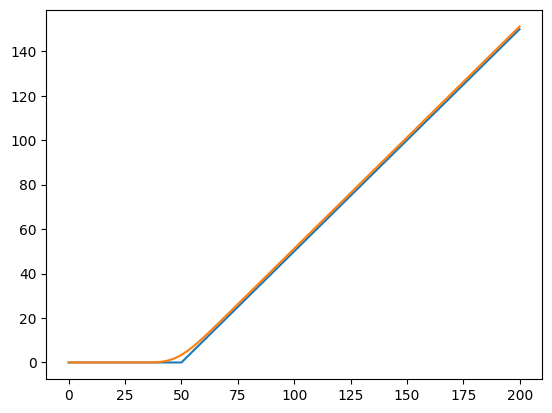

In [5]:
plt.plot(s, payoff[0])
plt.plot(s, res)
plt.show()

In [6]:
sample = np.argmin(np.abs(s-spot_price))
print(f"Value of option is ${res[sample]:.2f}")

Value of option is $3.43
